# Brainbox Group 15 Joint Project Report 


# Executive Summary



The problem that our project addressed is centered around creating a new way to play games hands-free, contributing to the innovations made in the gaming industry in recent years. By engaging this in task, we aim to address two current issues:
 

*   Decreasing the level of contact in gaming by decreasing the use of keyboards and joysticks in a covid-19 context.
*   Enabling individuals with physical disabilities to also interact with games.

Our team devised a solution; to integrate the classification of eye movements from spikerbox technology and sound from microphone inputs into a space-invaders game. This solution involved a detailed analysis on time series wave data in order to render the desired outputs. Our main findings saw the simple classifier working the best for actual left right classification, whereas machine learning was unable to differentiate between left and right eye movements but was robust towards blinks and noisy data. In analysing the various cross validated classification accuracy results and latency tests on both training and live test data, The practicality of such analysis was clearly demonstrated in vastly improved playability with accurate and responsive real time classifications and this analysis is relevant in evaluating performance of all future games requiring similar streaming inputs.


# Aim and Background

The gaming industry is growing exponentially and thus far, has largely failed to accommodate everyone in their capacities. Individuals with disabilities, specifically those affecting motor function, are left without gaming apparatus that is suited for their needs. This project aims at giving these individuals the opportunity to participate in the gaming revolution by using spikerbox technology to read their eye movements and translate their intentions to game commands. Using the game Space Invaders, we can demonstrate this technology by translating left and right eye movements, allowing the player to move the ship in discrete horizontal intervals. Additionally, a microphone is used to allow the player to shoot a laser beam down the lane the ship is currently in.

Our aim is to achieve a space invaders game controlled with voice and eye movement, completely replicating the experience users get when using traditional controls. This includes a reasonable eye movement classification accuracy and low latency for smooth movement.

Classifying eye movements is the core challenge of this project, and in order to gauge the most effective approach, a number of classifiers were developed. First, a multinomial logistic regression classifier capable of differentiating blinks, left, and right movements, and second, a simple rule based classifier using wave output standard deviation to recognise movements, and peak identification to distinguish movements. These models were tested with both filtered and raw data, were tested to achieve our goal of a working Space Invaders game with high accuracy and low latency control using the eyes and the voice.

# Methods


## Data Collection

In order to facilitate data collection for training and testing possible models, a python program was written to record signals from the brainbox tech and name the file according to the eye movement it represents. The flexibility of this program allowed for tweaking of parameters such as signal length and filtering settings. As a result, it was an easy task to collect a large variety of data which is balanced. This would be used for model training and accuracy analysis.

To collect the data, two electrodes were placed above the participant’s right eye; one near the temple, and the other in line with the edge of the nose, where the two identical red wires are attached. Another electrode was attached behind the participant's ear on the mastoid process, where the black ground wire is connected. After the participant was connected to the spikerbox, we collected balanced eye movement data containing single examples of blinks, left and right movements. We collected raw data from multiple people on different occasions to create a variety of different potential player scenarios, while controlling the positioning of the electrodes, the movements from the eye and ensuring the spikerboxes were giving a correct signal before conducting the data collection.

We noticed throughout the data collection and product development stages, that the spikerboxes we used tended to be temperamental, presenting a challenge to produce reliable and consistent results between different boxes and on different occasions. This was often fixed with the replacement of a battery, the slight changing of positioning in the electrodes, or restarting the program, but we regularly resorted to changing boxes in order to get better results. This was a large challenge in the project, but we eventually managed to collect data for training and testing our proposed models of spiker classification.

In addition to eye movement data, our program also implemented audio inputs from the participant’s voice using the computer’s embedded microphone. The goal for our final game was for the participant to make a specific sound which triggered the game to shoot. We collected a variety of everyday sounds such as whistling, humming and regular words such as “shoot” to test our potential microphone classifiers. Within each test participant stood 30-50cm away from the inbuilt microphone which was varied throughout the data collection process, but we attempted to control background noise to a minimum during these recordings.



## Developed Models

The live framework of data collection and processing involved setting up the participant in the same controlled way that we used to collect the training data, and real-time inputs simultaneously from both the spikerbox and the computer microphone. These signals were stored in separate window arrays in the code, and the processing of each signal to determine the game movements was done separately.

The eye movement data would be put through any filters before being processed by a movement detector, followed by a classifier with an ‘L’ or ‘R’ output. In theory, the filters would help the classifiers easily identify movements, the movement detector would determine if there had been an eye movement in the window, and the classifier would identify which direction the eye moved in, left or right. We experimented with each step in this model to attempt to produce the best outcome based on our evaluation strategies. In addition to this, we have a calibration step to organise the orientation of the red wires, so that the signals remain consistent throughout different setups of the device.

The microphone data was processed with a separate classifier. We utilised an amplitude detector, so that a participant saying the word “shoot” triggers an audio threshold volume, telling the game to shoot. In the final product, we also include a calibration of the voice before the game, so that the amplitude threshold is set to the right volume.

To assist the spiker classifiers in interpreting left and right eye movements, we implemented a notch filter for the 50 Hz power outlet signal, as well as high and low pass Butterworth filters for removing noise. To calibrate the best frequency range for the filters, we tested qualitatively by looking at the eye movement signal from pre-recorded data and assessing which filtered signal gives the most identifiable signal to the human eye. It was decided that the best signal was given using the 50 Hz notch filter and the frequency range of 3-40 Hz. These filters were both applied to the different classifiers, and the accuracy of each was quantitatively tested.

### Logistic Regression
In order to classify the signals received from the user, a multinomial logistic regression classifier was trained to predict left-right movements and blinks. To increase the accuracy of this classifier, it was necessary to perform feature selection on the list of time series features which were available. The following features were found to have the highest correlation: flat spots, crossing points, autocorrelation features, mean, and standard deviation.

Feature selection included performing Lasso regression followed by a manual selection. Lasso regression introduces a l1 penalty on the loss function, forcing the least-contributing features’ coefficients to zero. This addresses potential issues of multicollinearity by shrinking one of the two highly-correlated features to zero. As a result, the classifier should have better chances of classifying waves with varying noise levels. 

As a way to correct overfitting, L2 regularisation (Ridge) was used. Due to the nature of the data, this penalty was chosen to combat the unpredictable and sporadic noise levels. Using this penalty in addition to feature selection is an extra measure of reducing the effects of both noise and irrelevant predictors, effectively making the classifier more robust to the varying features of the incoming waves.

### Simple Classifier
In order to gauge the most effective classification method, a simple rule based classifier was developed to compare with the machine learning classifier. This classifier simply took in a wave and identified the amplitude peaks, noting down the order of which they appear. Due to the unreliability of the spikerbox technology, it was common for there to be random spikes in wave amplitude throughout the waves. These were taken into consideration and the proposed solution was to choose the pair of peaks (i.e., positive and negative) with the smallest distance between them. It was found to be highly unlikely for these spikes to appear in close proximity to each other, let alone a negative followed by a positive, or vice versa. 


## Evaluation Strategies

Evaluation strategies employed by the team included accuracy and latency analysis. Model accuracy evaluation techniques included 4-fold cross-validation and computing a confusion matrix for a random train-test split. Using these strategies, we were able to conduct a number of experiments to determine an ideal value for inverse regularisation strength and test if a simple rule-based classifier would yield more accurate results. 

One of the main qualitative metrics from a physics perspective is the latency between the classification of a movement to the register of a movement within the space invaders game. This involved using the time.time() funtion in python to ensure that we could capture the latencies of both classifiers when implemented within the game. The latencies of the figures were then plotted out using the time.

<img src="./LR_accuracy.PNG">

*Figure 1. Logistic Regression Classification Accuracy*

Figure 1 shows that the average accuracy of the multinomial regression classifier was around 66 +/- 10 % for unfiltered waves. The filtered wave accuracy was around 42% (See [Appendix C](#Appendix-C)). On the other hand, the simple classifier accuracy was found to be 75% on 109 unfiltered samples and 38% on filtered waves. See [Appendix E](#Appendix-E) for a confusion matrix of simple classifier accuracy. While the obvious advantage of multinomial regression is the ability to handle blinks, the simple classifier was chosen as the main model for two reasons. Firstly, it had significantly better left-right movement performance, which is crucial for optimal user experience. Secondly, it did not require pre-training and produced predictions faster, which was particularly desirable under streaming conditions, where a rapid response was required as the difficulty level increased.


### Qualitative Evaluation
Another way to evaluate the effectiveness of this model is to analyse the simple classification latency. Here, we define latency as the time it takes between the moment a signal is registered from the spikerbox to the moment it is classified (essentially, to the moment the game ship responds).Since the success of this software relies on the user being able to easily play Space Invaders, this evaluation metric is highly relevant.


<img src="./latency_graph.png">

*Figure 2. Classification Latency* [Appendix C](#Appendix-C)

The above graph shows the latency over a minute of gameplay with numerous movements, which are undistinguishable, where the red line represents 3 standard deviations away from the mean latency, thus everything below the red line represents 99.7% of all latencies. Since the standard deviation of these results was approximately 5 milliseconds (see [Appendix B](#Appendix-B)), there was no noticable effect on latency regardless of any eye movement.

Two factors which were believed to greatly influence the classifier accuracy, were window size and overlap. Below is a boxplot representing the accuracy of varying window sizes, for half overlapping windows and zero-overlap windows, on three pre-recorded live data samples of length 1 minute each. 

<img src="./windows.png">

*Figure 3. Accuracy across varying window sizes and overlap factors*

First point to notice is that all accuracies for half overlapping windows are negative. The reason for this is due to the lack of a robust accuracy measurement function. Levenschtein distance was used to compare the predicted labels (as a string) with the true labels (as a string). However, since using half overlapping windows producing twice as many windows with potential movements, it is more likely that there will be a classification. Thus the predicted labels string will be much longer than the actual labels. The accuracy computation is as follows:

`( (length(true_labels) - levenschtein_distance(predicted, true)) / length(true_labels) ) * 100`

The second point to note is that the logistic regression (LR) classifier and simple rule based classifier were used in conjunction. Considering the LR classifier was robust to blinks (and other noise), but was not able to distinguish left and right, the simple rule based classifier was tasked with classifying all that is not predicted as blinking (or noise).

Third point to note is that these accuracies were averaged over results from 3 different 1 minutes waves. Upon inspection into the results of the code in [Appendix C](#Appendix-C), it was found that the standard deviation between each recording, for both overlapping types, was quite large (Please refer to [Appendix D](#Appendix-D)).

From this graph, it can be seen that no overlap between windows and 2 second long windows yielded the best accuracy. Thus, in the final product the new data read in from the spikerbox was stored until 2 seconds worth of data was ready to be analysed and no overlapping windows were considered. However, this produced the undesirable effect of sluggish movements as the game would only let you move every 2 seconds. As a result, this value was reduced down to 1 second and this was the final parameter setting. 

# Results

Our final product begins with the option to calibrate the eye movement, and a calibration of the amplitude detector for the microphone input. The participant is asked to make 5 left movements, followed by 5 noises they will use to shoot. Following this the game begins, with the participant’s left/right eye movements controlling the player’s left/right movement, and their voice controlling the shooting of the player.

From the proposed evaluation strategies, the final approach entailed the simple rule based classifier which analysed the peaks of the raw waves. Despite training a logistic regression model and conducting experiments to derive the most effective parameter tunings, this solution was decided on as the livestreaming classification results were just more accurate. The reason for this is believed to be a difference in the processing of the training data and the live input data.

The filtered data also turned out to be less accurate than the raw eye movement data, as with a reliable spikerbox, the signal was really obvious and easy to detect with the simple classifier.

Our final spiker classifier accuracy on pre-recorded data was (75 +/- 4)%, whereas in the real-time conditions, it classified 18/20 eye movements correctly, giving around (90 +/- 7)% accuracy.

Additionally, the microphone amplitude detector accuracy was measured to be (98 +/- 1)% (See [Appendix F](#Appendix-F))

![diagram](https://drive.google.com/uc?export=view&id=1y8C8-IG3Z6LjvjPo5qo8xv9GAGRI-8fI)

*Figure 4. Deployment Pipeline Flowchart.*

![diagram](https://drive.google.com/uc?export=view&id=1SBz9vOgjFeDRuny2u2OLQkH1SYTDNLxe)

*Figure 5. Gameplay image*


# Discussion

There was a period in the beginning where the students from both disciplines lacked synchronisation in that knowledge barriers were yet to be broken (Bronstein, 2003). Once team discussions had taken place, and the goals of the project were laid out, our team had aligned viewpoints allowing us to break down tasks and delegate accordingly (Shapiro, 2008). 

## Shortcomings
The logistic regression (LR) classifier gave good results with pre-recorded data, however when it came to the real-time implementation, the LR classifier did not perform as well as the simple classifier. After spending some time attempting to fix this error, we decided that the final product would have the simple classifier as we could not find a solution to this problem. We think this may be an issue of integration with the coding, as there may be some difference between the storage of the real-time window data and the pre-recorded training data in wav files, but we were unable to precisely identify this in the time allocated. 

## Improvements and Future Work 

Unlike regression, the simple classifier is not robust to blinks. Using the LR classifier and the simple rule based classifier in conjunction would allow for a much more robust and accurate classification. 

It was also found that the filtered eye movement data was less accurate than the unfiltered data. This was likel the filters were anchored too early based on not enough data. To improve this, we could take a more holistic approach to filtering, experimenting quantitatively with the accuracy of the classifiers after we had developed them, independently varying the frequency range of the filters. 

Finally, to create a better classifier for the vocal input, we could try measuring the signature waveform of the word, and generating statistics on this such as the Fourier transform to better identify the word. This would also restrict the game to just using the word “shoot” to trigger the laser, rather than just any noise above a certain threshold volume.


## Future work 
This solution can be implemented into consoles and computers as a means of access and control, especially improving the lives of those living with a physical disability as it can increase technological convenience and add to their quality of life by enabling more control and accessibility over technology. Further future developments will include increasing the number of bodily inputs accepted to harness greater remote control capabilities.

# Conclusion 

The project successfully built a game with eye movement and voice input using a simple classifier and amplitude detector. Improvements could be made by using the regression classifier for differentiating blinks with the simple classifier for classifying eye movements. Future applications include a headgear embedded with the brainbox like other VR headsets to play games. Moreover, the integration into home computers for those who can’t use a mouse or keyboard.



word count: 2993

# Student Contribution  

**Josh** - Helped tune the game parameters to improve playability, was a subject of data collection.

**Dylan** - Produced majority of the data-related code sections for the final game. Produced code for figure 2 and figure 3. Report Sections: Method, Discussion, Results.

**Leo** - Ideated the space invaders game, assisting in the integration of the game microphone and brainbox input, and contributed in the creation of the presentation and writing of the report (Executive summary, aims and methods & report editing). Wrote various functions for wave transformations and continually tested and verified the performance of our project by attending lab sessions. 

**Keegan** - Contributed to physics understanding with model development, data collection and integration of the separate input, classifier and game programs. Introduced the audio input to the project and report, and worked to combine the inputs and processing in the code.

**Olga** -  Majority of work was in data collection and data pre-processing, classifer work (esp. regression) and the entire feature selection section; report sections: Method+Aim and Background, Evaluation Techniques (produced evaluation plots, confusion matrices and errors), aims (with Keegan), final formatting and tidying up. 

**Stephen** - Contributed to the physics perspective of the project such as with the model development through the development of filter’s within the game. Worked on the report by contribution to the physics understanding and views of the project and finally with the conclusion. 

# References 

- Bronstein, L. R. (2003). A model for interdisciplinary collaboration. Social work, 48(3), 297-306.

- EnhanceDataScience (2017). “Machine Learning Explained: Regularization”. Available at https://www.r-bloggers.com/2017/07/machine-learning-explained-regularization/ 

- Kelly, C. (2021). “Gaming: The next super platform”. Accenture Software and Platforms Insights. Available at https://www.accenture.com/

- Shapiro, E. J., & Dempsey, C. J. (2008). Conflict resolution in team teaching: A case study in interdisciplinary teaching. College teaching, 56(3), 157-162.


# Appendices

Below is the required imports, globals, and functions to run the following appendices.

In [ ]:
################################
# INSTALL ALL REQUIRED MODULES #
################################

! python3 -m pip install -r requirements.txt

####################
# RELEVANT IMPORTS #
####################

import numpy as np
import os, time, sys
from scipy.io import wavfile
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import tsfeatures as tf
import pandas as pd
from cache_decorator import Cache
import pickle
import enchant
from Fourier import if_amplitude_over

###########
# GLOBALS #
###########

statistics = {"flat_spots" : tf.flat_spots,
              "crossing_points" : tf.crossing_points,
              "acf_features" : tf.acf_features,
              "mean" : np.mean,
              "stdev": np.std}
stat_functions = list(statistics.values())


#######################
# NECESSARY FUNCTIONS #
#######################

def find_shortest_distance(a,b):
    smallest_dist = None
    for i in a:
        for j in b:
            dist = abs(i - j)
            if smallest_dist == None or dist < smallest_dist[0]:
                smallest_dist = [dist, i, j]
    return (smallest_dist[1], smallest_dist[2])

def simple_classifier(data):
    pos_peaks = np.where(data == np.amax(data))
    neg_peaks = np.where(data == np.amin(data))
    pos_peak, neg_peak = find_shortest_distance(pos_peaks[0], neg_peaks[0])
    
    if pos_peak < neg_peak:
        return 0
    elif pos_peak > neg_peak:
        return 1

    return -1

def read_wave(path):
    if not os.path.exists(path):
        print(f"FILE NOT FOUND: {path}")
        exit()
    else:
        samplerate, raw_data = wavfile.read(path)
        time = np.array(range(0,len(raw_data)))/samplerate
        wave = { 'y' : raw_data, 'time' : time, 'samplerate' : samplerate }
        return wave

def get_actual_labels(path, classifier):
    labels = []
    if not os.path.exists(path):
        print("ERROR: PATH NOT VALID")
        return None
    for root, dirs, files in os.walk(path, topdown=False):
        # Iterating through the directory containing training data
        for name in files:
            if classifier == "simple":
                if name.endswith("S.wav"):
                    wave_file = path + "/" + name
                    name_lst = wave_file.split("_")
                    label = name_lst[len(name_lst)-1]
                    
                    label = label.strip("-S.wav")
                    if (label =="R"):
                        label = "1"
                    else:
                        label = "0"

                    labels.append(label)
            else:
                wave_file = path + "/" + name
                name_lst = wave_file.split("_")
                label = name_lst[len(name_lst)-1]
                
                label = label.strip(".wav")
                if (label =="B"):
                    label = "2"
                elif (label == "R-S"):
                    label = "1"
                else:
                    label = "0"

                labels.append(label)

    return labels

def logistic_read_training_data(path, balance_data = False):
    """
    Reads in the training data .wav files from the specified local directory,
    generates statistics on each wave, and outputs the dataset.

    @param path     : path to local directory containing training data
    @type path      : str
    @return dataset : dataset like { waveId : [0, ...], stat1 : [s11, s12, ...], stat2 : [s21, s22, ...], ... }
    @rtype          : pandas DataFrame
    """
    data = {}
    labels = []
    if not os.path.exists(path):
        print("ERROR: PATH NOT VALID")
        return None
    
    for root, dirs, files in os.walk(path, topdown=False):
        # Iterating through the directory containing training data
        for name in files:
            #print(f"READING {name}")
            if name.endswith(".wav"):
                wave_file = path + "/" + name
                # read the wave file
                wave = read_wave(wave_file)
                ###### extract label from the filename ##########
                name_lst = wave_file.split("_")
                label = name_lst[len(name_lst)-1]
                if (label == "B.wav"):
                    label = "2" # blink

                else:
                    label = label.strip("-S.wav")
                    if (label =="R"):
                        label = "1"
                    else:
                        label = "0"
                labels.append(label)
                colnames, wave_stats = generate_statistics(wave)

                # Creating a dictionary in preparation for transformation to a dataframe
                for i, col in enumerate(colnames):
                    if not data.get(col):
                        # For the first iteration of the loop
                        data[col] = [wave_stats[i]]
                    else:
                        data[col].append(wave_stats[i])
    data["labels"] = labels
    data = pd.DataFrame(data)
    if (balance_data):
        data = balance_dataset(data)
    return data

def balance_dataset(data):
    len_r = len(data[data["labels"]=="1"])
    len_l = len(data[data["labels"]=="0"])

    smallest = len_l if len_r > len_l else len_r

    data_right = data[data["labels"]=="1"].sample(smallest, random_state=0)
    data_left = data[data["labels"]=="0"].sample(smallest, random_state=0)
    dat = pd.concat([data_right, data_left])
    return dat

def simple_prediction(path):
    labels = []
    if not os.path.exists(path):
        print("ERROR: PATH NOT VALID")
        return None
    
    for root, dirs, files in os.walk(path, topdown=False):
        # Iterating through the directory containing training data
        for name in files:
            if name.endswith("S.wav"):
                
                wave_file = path + "/" + name
                wave = read_wave(wave_file)
                label = simple_classifier(wave['y'])
                labels.append(str(label))
    return labels

def logistic_prediction(path, classifier, scaler):
    labels = []
    if not os.path.exists(path):
        print("ERROR: PATH NOT VALID")
        return None
    
    for root, dirs, files in os.walk(path, topdown=False):
        # Iterating through the directory containing training data
        for name in files:
            wave_file = path + "/" + name
            #print(f"Predicting {wave_file}...")
            wave = read_wave(wave_file)
            label = predict(wave, classifier, scaler)
            #print(f"Predicted: {label}")
            labels.append(str(label[0]))
                
    return labels


def build_classifier(training_path, wave_type, classifier = "LR", show_acc = False):
    """
    Builds the specific classifier - default is Logistic Regression - and trains it on the training data.

    @param training_path : local directory containining training data, i.e., .wav files and .txt files
    @type training_path  : str
    @param classifier    : which classifier to use
    @type classifier     : str
    @param show_acc      : flag used to show classifier accuracy
    @type show_acc       : boolean
    @return classifier   : linear regression classifier
    @rtype               : sklearn.linear_model type object
    """
    dataset = logistic_read_training_data(training_path)

    dataset = dataset[['flat_spots', 'crossing_points', 'diff2_acf10', 'stdev', 'labels']]

    # Take necessary rows and split labels into new dataset, y
    X = dataset.drop(["labels"], axis=1).values
    y = list(dataset["labels"])
    # Scale the data
    sc_X = StandardScaler()
    X = sc_X.fit_transform(X)
    # Divide into training (75%) and testing (25%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

    ######## binary classifier, l2 reg ##########
    classifier = LogisticRegression(multi_class= "multinomial", solver='saga', penalty = 'l2')
    classifier.fit(X, y) 
    if show_acc:
        determine_accuracy(classifier, X_test, y_test)
        plot_accuracy(classifier, X, y)

    # write classifier
    model_filename = f'model_{wave_type}.sav'
    pickle.dump(classifier, open(model_filename, 'wb'))
    
    # write scaler
    scaler_filename = f'scaler_{wave_type}.sav'
    pickle.dump(sc_X, open(scaler_filename, 'wb'))

    return classifier, sc_X

def determine_accuracy(model, X, y):
    """
    Generates a confusion matrix for the input predicted and target labels.

    @param model : Fitted logisitic regression model
    @type model  : sklearn.linear_model type object
    @param X     : All data (minus labels)
    @type X      : numpy array
    @param y     : Corresponding labels
    @type y      : numpy array
    """
    y_true = list(y)
    y_pred = model.predict(X)
    print(classification_report(y_true, y_pred))

def plot_accuracy(model, X, y):
    """
    Runs repeated CV on the model and returns the mean and sd of the accuracy to 3 decimal places.

    @param model : Fitted logisitic regression model
    @type model  : sklearn.linear_model type object
    @param X     : All data (minus labels)
    @type X      : numpy array
    @param y     : Corresponding labels
    @type y      : numpy array
    """

    # define the model evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
    # evaluate the model and collect the scores
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report the model performance
    plt.boxplot(list(n_scores))
    plt.title("4-fold CV Accuracy (10 repeats)")
    plt.ylabel("Accuracy")
    plt.xlabel("")
    plt.show()
    # print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

def generate_statistics(wave):
    """
    Generates the globally defined statistics* about a given wave (* see variable 'statistics')

    @param wave        : wave object
    @type wave         : dictionary
    @return colnames   : names of generated statistics (note: has wave_stats ordering)
    @rtype colnames    : list
    @return wave_stats : generated statistics (note: has colnames ordering)
    @rtype wave_stats  : list
    """
    stats = {}
    Y = wave['y']
    i=0
    for fun in stat_functions:
        dic = fun(Y)
        #print(dic)
        try:
            for k,v in dic.items():
                stats[k] = v
        except:
            if (i == 0):
                stats["mean"] = dic
                i+=1
            else:
                stats["stdev"] = dic
                
    colnames = list(stats.keys())
    wave_stats = list(stats.values())
    return colnames, wave_stats

def predict(wave, classifier, standard_scaler):
    colnames, wave_stats = generate_statistics(wave)
    wave_stats_reshape = np.reshape(wave_stats, (1,-1))
    # create a dataframe
    wave_stats_dataframe = pd.DataFrame(wave_stats_reshape, columns = colnames)
    # select specific stats
    wave_stats = wave_stats_dataframe[['flat_spots', 'crossing_points', 'diff2_acf10', 'stdev']]
    # just the values in an array
    wave_stats = np.array(wave_stats.values)
    # normalise
    wave_stats = standard_scaler.transform(wave_stats)
    # predict.
    label = classifier.predict(wave_stats)
    return label   

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


ModuleNotFoundError: ignored

## Appendix A
_Code to produce Figure 1_

> Note: This may take some time.

In [ ]:
wave_types = ["waves", "filtered"]
classifiers = ["simple", "LR"]
data_path = "training_data/spiker_waves"
build_classifier(data_path, wave_type="waves", show_acc=True)

## Appendix B
_Code to produce Figure 2_

> The data within latencies.csv was pre-collected as it requires connection to a spikerbox.

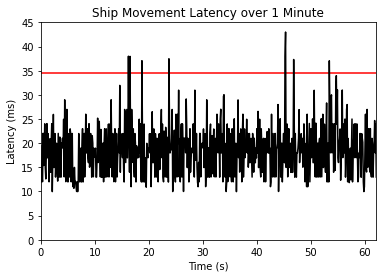

In [ ]:
with open("./latencies.csv") as f:
    latencies = [round(float(x.split(",")[0])*1000, 5) for x in f.readlines()[1:]]
time = [x/10 for x in range(len(latencies))]

line = np.mean(latencies)+(3*np.std(latencies))

plt.plot(time, latencies, color = "black")
plt.axis([0,62,0,45])
plt.hlines(y=line, xmin=0, xmax=62, color = "Red")
plt.title("Ship Movement Latency over 1 Minute")
plt.xlabel("Time (s)")
plt.ylabel("Latency (ms)")
plt.show()

In [ ]:
np.std(latencies)

5.234722229944538

## Appendix C
_Code to produce Figure 3_

> Note: This may take a very long time. Double click **here** to see the expected output before you see a graph...

<!-- 
Trying wave 1 with window_size = 0.5 seconds and overlap_factor=0.5
Trying wave 1 with window_size = 0.5 seconds and overlap_factor=1
Trying wave 2 with window_size = 0.5 seconds and overlap_factor=0.5
Trying wave 2 with window_size = 0.5 seconds and overlap_factor=1
Trying wave 3 with window_size = 0.5 seconds and overlap_factor=0.5
Trying wave 3 with window_size = 0.5 seconds and overlap_factor=1
Trying wave 1 with window_size = 1 seconds and overlap_factor=0.5
Trying wave 1 with window_size = 1 seconds and overlap_factor=1
Trying wave 2 with window_size = 1 seconds and overlap_factor=0.5
Trying wave 2 with window_size = 1 seconds and overlap_factor=1
Trying wave 3 with window_size = 1 seconds and overlap_factor=0.5
Trying wave 3 with window_size = 1 seconds and overlap_factor=1
Trying wave 1 with window_size = 1.5 seconds and overlap_factor=0.5
Trying wave 1 with window_size = 1.5 seconds and overlap_factor=1
Trying wave 2 with window_size = 1.5 seconds and overlap_factor=0.5
Trying wave 2 with window_size = 1.5 seconds and overlap_factor=1
Trying wave 3 with window_size = 1.5 seconds and overlap_factor=0.5
Trying wave 3 with window_size = 1.5 seconds and overlap_factor=1
Trying wave 1 with window_size = 2 seconds and overlap_factor=0.5
Trying wave 1 with window_size = 2 seconds and overlap_factor=1
Trying wave 2 with window_size = 2 seconds and overlap_factor=0.5
Trying wave 2 with window_size = 2 seconds and overlap_factor=1
Trying wave 3 with window_size = 2 seconds and overlap_factor=0.5
Trying wave 3 with window_size = 2 seconds and overlap_factor=1
Trying wave 1 with window_size = 2.5 seconds and overlap_factor=0.5
Trying wave 1 with window_size = 2.5 seconds and overlap_factor=1
Trying wave 2 with window_size = 2.5 seconds and overlap_factor=0.5
Trying wave 2 with window_size = 2.5 seconds and overlap_factor=1
Trying wave 3 with window_size = 2.5 seconds and overlap_factor=0.5
Trying wave 3 with window_size = 2.5 seconds and overlap_factor=1 
-->

In [ ]:
# Read in trained logistic regression model and associated scaler 
model_filename = "model_waves.sav"
scaler_filename = "scaler_waves.sav"

if os.path.exists(model_filename) and os.path.exists(scaler_filename):                      
    classifier = pickle.load(open(model_filename, 'rb'))
    scaler = pickle.load(open(scaler_filename, 'rb'))
else:
    print("ERROR: Cannot find model and scalar.")

statistics = {"flat_spots" : tf.flat_spots,
              "crossing_points" : tf.crossing_points,
              "acf_features" : tf.acf_features,
              "mean" : np.mean,
              "stdev": np.std}

stat_functions = list(statistics.values())    

def generate_statistics(wave):
    stats = {}
    Y = wave
    i=0
    for fun in stat_functions:
        dic = fun(Y)
        try:
            for k,v in dic.items():
                stats[k] = v
        except:
            if (i == 0):
                stats["mean"] = dic
                i+=1
            else:
                stats["stdev"] = dic
                
    colnames = list(stats.keys())
    wave_stats = list(stats.values())
    return colnames, wave_stats
    
def predict(wave, classifier, standard_scaler):
    colnames, wave_stats = generate_statistics(wave)
    # get rid of nan values
    #wave_stats[np.isnan(wave_stats)] = 0
    wave_stats_reshape = np.reshape(wave_stats, (1,-1))
    # create a dataframe
    wave_stats_dataframe = pd.DataFrame(wave_stats_reshape, columns = colnames)
    # select specific stats
    wave_stats = wave_stats_dataframe[['flat_spots', 'crossing_points', 'diff2_acf10', 'stdev']]
    # just the values in an array
    wave_stats = np.array(wave_stats.values)
    # normalise

    wave_stats = standard_scaler.transform(wave_stats)
    # predict.
    label = int(classifier.predict(wave_stats)[0])
    return label    
    
    
def find_shortest_distance(a,b):
    smallest_dist = None
    for i in a[0]:
        for j in b[0]:
            dist = abs(i - j)
            if smallest_dist == None or dist < smallest_dist[0]:
                smallest_dist = (dist, i, j)
    return smallest_dist[1], smallest_dist[2]

def simple_classify(data):
    pos_peaks = np.where(data == np.amax(data))
    neg_peaks = np.where(data == np.amin(data))
    pos_peak, neg_peak = find_shortest_distance(pos_peaks, neg_peaks)
    if pos_peak < neg_peak:
        return "L"
    elif pos_peak >= neg_peak:
        return "R"

live_recordings_path = "training_data/streamed/"

def run_classifier(wave_filename, window_size, true_labels, overlap_factor):
    try:
        wave_path = live_recordings_path + wave_filename
        samplerate, raw_wave = wavfile.read(wave_path)
        actual_samplerate = int(samplerate/2) # this is due to incorrect writing of the header at recording time, it is actually 10000 not 20000, making the total wave time 1 minute and not 30 seconds.
        increment = int(actual_samplerate * window_size)
        predicted = []
        start_interval = 0
        end_interval = increment
        while True:

            if start_interval >= len(raw_wave) or end_interval > len(raw_wave):
                break         
            
            # only look at desired window
            window = raw_wave[start_interval:end_interval]
            
            # UNCOMMENT TO SEE WINDOWS
            # plt.plot(window)
            # plt.axis([0,10000,400,650])
            # plt.show()

            # filter out noise using logistic regression
            movement_bool = predict(window, classifier, scaler)
            if movement_bool != 2:
                # add to predicted labels
                predicted_label = simple_classify(window)
                predicted.append(predicted_label)
            
            # slide window
            start_interval += int(increment * overlap_factor)
            end_interval += int(increment * overlap_factor)
            
        # print(f"{predicted=}\n{true_labels=}")
        correctly_predicted = len(true_labels) - enchant.utils.levenshtein("".join(predicted), "".join(true_labels))
        acc = (correctly_predicted / len(true_labels)) * 100
        return acc
        
    except FileNotFoundError as e:
        print(f"ERROR: Cannot find {wave_filename}. Please check that {wave_filename} is stored in {live_recordings_path}.")
        
waves = [
    "spiker_recording_2021-05-25_15.00.54_streamed.wav", 
    "spiker_recording_2021-05-25_15.03.13_streamed.wav", 
    "spiker_recording_2021-05-25_15.17.56_streamed.wav"
    ]

wave_true_labels = [
    ["R", "L", "R", "R", "R", "L", "R", "R", "L", "R", "R", "L", "R", "R", "L", "R", "L", "R", "L", "R", "R", "L", "L", "R", "R", "L", "L", "R", "L", "L", "R", "R", "R", "L", "L", "R", "L", "L", "L"],
    ["L", "L", "R", "R", "R", "L", "L", "R", "L", "R", "R", "L", "R", "L", "R", "R", "L", "L", "R", "R", "L", "R", "R", "L", "R", "L", "R", "L", "R", "L"],
    ["L", "R", "L", "R", "L", "R", "L", "R", "L", "R", "L", "L", "R", "L", "R", "L", "R", "L", "R", "L", "R", "L", "L", "L", "R"]
]

greatest_acc = 0
optimal_window_size = 1
window_accuracies_half_overlap = []
window_accuracies_no_overlap = []
window_sizes = [0.5, 1, 1.5, 2, 2.5]
overlap_factors = [0.5, 1]
most_accurate_method = None

for indpnt_time_var in window_sizes:
    wave_accuracies_half_overlap = []
    wave_accuracies_no_overlap = []
    for i, wave_filename in enumerate(waves):
        for overlap_factor in overlap_factors:
            
            print(f"Trying wave {i+1} with window_size = {indpnt_time_var} seconds and {overlap_factor=}")

            acc = run_classifier(wave_filename, window_size = indpnt_time_var, true_labels = wave_true_labels[i], overlap_factor=overlap_factor)

            if acc == -1:
                # In case of file not found error
                sys.exit(-1)

            if overlap_factor == 0.5:
                wave_accuracies_half_overlap.append(acc) 
            else:
                wave_accuracies_no_overlap.append(acc)
            
        # Half overlap
        mean_wave_acc_half_overlap = np.mean(wave_accuracies_half_overlap)
        window_accuracies_half_overlap.append(mean_wave_acc_half_overlap)
        
        # No overlap
        mean_wave_acc_no_overlap = np.mean(wave_accuracies_no_overlap)
        window_accuracies_no_overlap.append(mean_wave_acc_no_overlap)
    
    if mean_wave_acc_half_overlap >= greatest_acc:
        optimal_window_size = indpnt_time_var
        greatest_acc = mean_wave_acc
        most_accurate_method = "Half Overlap"
    if mean_wave_acc_no_overlap >= greatest_acc:
        optimal_window_size = indpnt_time_var
        greatest_acc = mean_wave_acc
        most_accurate_method = "No Overlap"

overlap = ["Half", "None"]
window_size_05 = [window_accuracies_half_overlap[0], window_accuracies_no_overlap[0]]
window_size_1 = [window_accuracies_half_overlap[1], window_accuracies_no_overlap[1]]
window_size_15 = [window_accuracies_half_overlap[2], window_accuracies_no_overlap[2]]
window_size_2 = [window_accuracies_half_overlap[3], window_accuracies_no_overlap[3]]
window_size_25 = [window_accuracies_half_overlap[4], window_accuracies_no_overlap[4]]

X_axis = np.arange(len(overlap))

plt.bar(X_axis - 0.2, window_size_05, 0.1, label = '0.5s')
plt.bar(X_axis - 0.1, window_size_1, 0.1, label = '1s')
plt.bar(X_axis, window_size_15, 0.1, label = '1.5s')
plt.bar(X_axis + 0.1, window_size_2, 0.1, label = '2s')
plt.bar(X_axis + 0.2, window_size_25, 0.1, label = '2.5s')
  
plt.xticks(X_axis, overlap)
plt.xlabel("Overlap Factor")
plt.ylabel("Accuracy (%)")
plt.title("Combined classifiers accuracies across varying window sizes and overlap factors")
plt.legend()
plt.show()

## Appendix D
_Code to produce accuracy standard deviation across the 3 1-minute long waves using in [Qualitative Evaluation](#Qualitative-Evaluation)_

In [ ]:
# Below are the results used to plot Figure 3 (saved as a png)
window_accuracies_half_overlap=[-179.4871794871795, -206.4102564102564, -238.94017094017093, -51.28205128205128, -78.97435897435898, -104.64957264957265, 7.6923076923076925, -14.487179487179485, -33.65811965811966, 48.717948717948715, 32.69230769230769, 20.461538461538463, 56.41025641025641, 48.205128205128204, 41.47008547008547]
window_accuracies_no_overlap=[2.564102564102564, -10.384615384615383, -26.923076923076923, 64.1025641025641, 53.717948717948715, 46.47863247863248, 74.35897435897436, 70.51282051282051, 67.00854700854701, 69.23076923076923, 69.61538461538461, 71.74358974358974, 56.41025641025641, 58.205128205128204, 62.8034188034188]

print("Wave 1 SD (Half Overlap): ", round(np.std(window_accuracies_half_overlap[::3]), 2),"%")
print("Wave 2 SD (Half Overlap): ", round(np.std(window_accuracies_half_overlap[1::3]), 2),"%")
print("Wave 3 SD (Half Overlap): ", round(np.std(window_accuracies_half_overlap[2::3]), 2),"%")

print("Wave 1 SD (No Overlap): ", round(np.std(window_accuracies_no_overlap[::3]), 2),"%")
print("Wave 2 SD (No Overlap): ", round(np.std(window_accuracies_no_overlap[1::3]), 2),"%")
print("Wave 3 SD (No Overlap): ", round(np.std(window_accuracies_no_overlap[2::3]), 2),"%")


Wave 1 SD (Half Overlap):  86.81 %
Wave 2 SD (Half Overlap):  92.58 %
Wave 3 SD (Half Overlap):  101.42 %
Wave 1 SD (No Overlap):  26.07 %
Wave 2 SD (No Overlap):  30.06 %
Wave 3 SD (No Overlap):  36.57 %


## Appendix E
_Code to produce simple rule based classifier confusion matrix_

In [ ]:
def find_shortest_distance(a,b):
    smallest_dist = None
    for i in a:
        for j in b:
            dist = abs(i - j)
            if smallest_dist == None or dist < smallest_dist[0]:
                smallest_dist = [dist, i, j]
    return (smallest_dist[1], smallest_dist[2])

def simple_classifier(data):
    pos_peaks = np.where(data == np.amax(data))
    neg_peaks = np.where(data == np.amin(data))
    pos_peak, neg_peak = find_shortest_distance(pos_peaks[0], neg_peaks[0])
    
    if pos_peak < neg_peak:
        return 0
    elif pos_peak > neg_peak:
        return 1

    return -1

def read_wave(path):
    if not os.path.exists(path):
        print(f"FILE NOT FOUND: {path}")
        exit()
    else:
        samplerate, raw_data = wavfile.read(path)
        time = np.array(range(0,len(raw_data)))/samplerate
        wave = { 'y' : raw_data, 'time' : time, 'samplerate' : samplerate }
        return wave

def get_actual_labels(path, classifier):
    labels = []
    if not os.path.exists(path):
        print("ERROR: PATH NOT VALID")
        return None
    for root, dirs, files in os.walk(path, topdown=False):
        # Iterating through the directory containing training data
        for name in files:
            if classifier == "simple":
                if name.endswith("S.wav"):
                    wave_file = path + "/" + name
                    name_lst = wave_file.split("_")
                    label = name_lst[len(name_lst)-1]
                    
                    label = label.strip("-S.wav")
                    if (label =="R"):
                        label = "1"
                    else:
                        label = "0"

                    labels.append(label)
            else:
                wave_file = path + "/" + name
                name_lst = wave_file.split("_")
                label = name_lst[len(name_lst)-1]
                
                label = label.strip(".wav")
                if (label =="B"):
                    label = "2"
                elif (label == "R-S"):
                    label = "1"
                else:
                    label = "0"

                labels.append(label)

    return labels


def logistic_read_training_data(path, balance_data = False):
    """
    Reads in the training data .wav files from the specified local directory,
    generates statistics on each wave, and outputs the dataset.

    @param path     : path to local directory containing training data
    @type path      : str
    @return dataset : dataset like { waveId : [0, ...], stat1 : [s11, s12, ...], stat2 : [s21, s22, ...], ... }
    @rtype          : pandas DataFrame
    """
    data = {}
    labels = []
    if not os.path.exists(path):
        print("ERROR: PATH NOT VALID")
        return None
    
    for root, dirs, files in os.walk(path, topdown=False):
        # Iterating through the directory containing training data
        for name in files:
            print(f"READING {name}")
            if name.endswith(".wav"):
                wave_file = path + "/" + name
                # read the wave file
                wave = read_wave(wave_file)
                #print(wave)
                # TODO: Either use find_eye_movements function here to get intervals of movement for each training
                #       data .wav file OR we can use the txt files (still unsure how to interpret them though)

                ###### extract label from the filename ##########
                name_lst = wave_file.split("_")
                label = name_lst[len(name_lst)-1]
                if (label == "B.wav"):
                    label = "2" # blink

                else:
                    label = label.strip("-S.wav")
                    if (label =="R"):
                        label = "1"
                    else:
                        label = "0"

                labels.append(label)
                colnames, wave_stats = generate_statistics(wave)

                # Creating a dictionary in preparation for transformation to a dataframe
                for i, col in enumerate(colnames):
                    if not data.get(col):
                        # For the first iteration of the loop
                        data[col] = [wave_stats[i]]
                    else:
                        data[col].append(wave_stats[i])

    data["labels"] = labels
    # print(labels)
    ############ remove blinks for now ###############
    data = pd.DataFrame(data)
    #data = data[data["labels"]!="2"]
    # print(data)
    if (balance_data):
        data = balance_dataset(data)
    return data

def balance_dataset(data):
    len_r = len(data[data["labels"]=="1"])
    len_l = len(data[data["labels"]=="0"])

    smallest = len_l if len_r > len_l else len_r

    data_right = data[data["labels"]=="1"].sample(smallest, random_state=0)
    data_left = data[data["labels"]=="0"].sample(smallest, random_state=0)
    dat = pd.concat([data_right, data_left])
    return dat

def simple_prediction(path):
    labels = []
    if not os.path.exists(path):
        print("ERROR: PATH NOT VALID")
        return None
    
    for root, dirs, files in os.walk(path, topdown=False):
        # Iterating through the directory containing training data
        for name in files:
            if name.endswith("S.wav"):
                
                wave_file = path + "/" + name
                wave = read_wave(wave_file)
                label = simple_classifier(wave['y'])
                labels.append(str(label))
                
    return labels

def logistic_prediction(path, classifier, scaler):
    labels = []
    if not os.path.exists(path):
        print("ERROR: PATH NOT VALID")
        return None
    
    for root, dirs, files in os.walk(path, topdown=False):
        # Iterating through the directory containing training data
        for name in files:
            
            wave_file = path + "/" + name
            print(f"Predicting {wave_file}...")
            wave = read_wave(wave_file)
            label = predict(wave, classifier, scaler)
            print(f"Predicted: {label}")
            labels.append(str(label[0]))
                
    return labels


def build_classifier(training_path, wave_type, classifier = "LR", show_acc = False):
    # REFERENCE: https://in.springboard.com/blog/logistic-regression-explained/
    """
    Builds the specific classifier - default is Logistic Regression - and trains it on the training data.

    @param training_path : local directory containining training data, i.e., .wav files and .txt files
    @type training_path  : str
    @param classifier    : which classifier to use
    @type classifier     : str
    @param show_acc      : flag used to show classifier accuracy
    @type show_acc       : boolean
    @return classifier   : linear regression classifier
    @rtype               : sklearn.linear_model type object
    """
    dataset = logistic_read_training_data(training_path)

    ########## left and right only ################
    #dataset = dataset[dataset["labels"]!="2"]

    ######## specify the features after running lasso feature selection ##########
    #dataset = dataset[['diff2_acf10', 'stdev', 'labels']]
    dataset = dataset[['flat_spots', 'crossing_points', 'diff2_acf10', 'stdev', 'labels']]

    # Take necessary rows and split labels into new dataset, y
    X = dataset.drop(["labels"], axis=1).values
    y = list(dataset["labels"])
    # Divide into training (75%) and testing (25%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

    # Scale the data
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    ####### use this to test on the whole dataset #######
    #sc_X = StandardScaler()
    #X = sc_X.fit_transform(X)

    ##### multilinear ######
    #classifier = LogisticRegression(multi_class='multinomial', solver='saga')

    ######## binary classifier, l2 reg ##########
    classifier = LogisticRegression(multi_class= "multinomial", solver='saga', penalty = 'l2')
    #########################
    classifier.fit(X, y) #TODO: change this back to X_train, y_train
    
    if show_acc:
        determine_accuracy(classifier, X_test, y_test)
        plot_accuracy(classifier, X, y)

    # write classifier
    model_filename = f'model_{wave_type}.sav'
    pickle.dump(classifier, open(model_filename, 'wb'))
    
    # write scaler
    scaler_filename = f'scaler_{wave_type}.sav'
    pickle.dump(sc_X, open(scaler_filename, 'wb'))

    classifier.fit(X_train, y_train)

    # predict the class label
    # row = generate_statistics(wave)
    # y_hat = model.predict([row])
    # OR predict a multinomial probability distribution
    # y_hat = model.predict_proba([row])
    #classifier.predict(X_test)
    return classifier, sc_X

def determine_accuracy(model, X, y):
    """
    Runs repeated CV on the model and returns the mean and sd of the accuracy to 3 decimal places.

    @param model : Fitted logisitic regression model
    @type model  : sklearn.linear_model type object
    @param X     : All data (minus labels)
    @type X      : numpy array
    @param y     : Corresponding labels
    @type y      : numpy array
    """
    # make fake dataset (can delete later)
    # X, y = make_classification(n_samples=72, n_features=5, n_informative=5, n_redundant=0, n_classes=3, random_state=1)
    y_true = list(y)
    y_pred = model.predict(X)

    print(classification_report(y_true, y_pred))
    

    # define the model evaluation procedure
    # cv = RepeatedStratifiedKFold(n_splits=1, n_repeats=3, random_state=1)
    # evaluate the model and collect the scores
    # n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report the model performance

    # print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

def plot_accuracy(model, X, y):
    """
    Runs repeated CV on the model and returns the mean and sd of the accuracy to 3 decimal places.

    @param model : Fitted logisitic regression model
    @type model  : sklearn.linear_model type object
    @param X     : All data (minus labels)
    @type X      : numpy array
    @param y     : Corresponding labels
    @type y      : numpy array
    """

    # define the model evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=10, random_state=1)
    # evaluate the model and collect the scores
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report the model performance

    plt.boxplot(list(n_scores))
    plt.title("4-fold CV Accuracy (10 repeats)")
    plt.ylabel("Accuracy")
    plt.xlabel("")
    plt.show()
    # print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

statistics = {"flat_spots" : tf.flat_spots,
              "crossing_points" : tf.crossing_points,
              "acf_features" : tf.acf_features,
              "mean" : np.mean,
              "stdev": np.std} # olga: see lasso_feature_selection

stat_functions = list(statistics.values())

def generate_statistics(wave):
    """
    Generates the globally defined statistics* about a given wave (* see variable 'statistics')

    @param wave        : wave object
    @type wave         : dictionary
    @return colnames   : names of generated statistics (note: has wave_stats ordering)
    @rtype colnames    : list
    @return wave_stats : generated statistics (note: has colnames ordering)
    @rtype wave_stats  : list
    """
    stats = {}
    Y = wave['y']
    i=0
    for fun in stat_functions:
        dic = fun(Y)
        #print(dic)
        try:
            for k,v in dic.items():
                stats[k] = v
        except:
            if (i == 0):
                stats["mean"] = dic
                i+=1
            else:
                stats["stdev"] = dic
                
    colnames = list(stats.keys())
    wave_stats = list(stats.values())
    return colnames, wave_stats

def predict(wave, classifier, standard_scaler):
    colnames, wave_stats = generate_statistics(wave)
    # get rid of nan values
    #wave_stats[np.isnan(wave_stats)] = 0
    wave_stats_reshape = np.reshape(wave_stats, (1,-1))
    # create a dataframe
    wave_stats_dataframe = pd.DataFrame(wave_stats_reshape, columns = colnames)
    # select specific stats
    wave_stats = wave_stats_dataframe[['flat_spots', 'crossing_points', 'diff2_acf10', 'stdev']]
    # just the values in an array
    wave_stats = np.array(wave_stats.values)
    # normalise

    wave_stats = standard_scaler.transform(wave_stats)
    # predict.
    label = classifier.predict(wave_stats)
    return label


wave_types = ["waves", "filtered"]
classifiers = ["simple"]
data_path = "new_training_data/spiker_"

for wave_type in wave_types:

    # running accuracy test             

    for classifier_type in classifiers:
        print(f'TESTING ACCURACY for {wave_type if wave_type == "filtered" else "unfiltered"} waves with {classifier_type} classifier...')

        actual_labels = get_actual_labels(f"{data_path}{wave_type}", classifier = classifier_type)

        predicted_labels = simple_prediction(f"{data_path}{wave_type}")

        # print(f"Actual labels: {actual_labels}")
        # print(f"Predicted labels: {predicted_labels}")

        if len(actual_labels) != len(predicted_labels):
            print("ERROR")
            exit(1)

        #confusion matrix building

        counter = 0
        left_correct = 0
        right_correct = 0
        left_wrong = 0
        right_wrong = 0

        for a,p in zip(actual_labels, predicted_labels):
            if a == p:
                counter += 1
            if a == "0" and p == "0":
                left_correct += 1
            if a == "1" and p == "1":
                right_correct += 1
            if a == "0" and p == "1":
                left_wrong += 1
            if a == "1" and p == "0":
                right_wrong += 1

        print("   | PL | PR")
        print("=="*11)
        print(f"TL | {left_correct} | {left_wrong}")
        print(f"TR | {right_wrong} | {right_correct}")

        print("Accuracy: {:0.2f}%\n".format( (counter/len(actual_labels))*100) )

TESTING ACCURACY for unfiltered waves with simple classifier...
   | PL | PR
TL | 43 | 13
TR | 14 | 39
Accuracy: 75.23%

TESTING ACCURACY for filtered waves with simple classifier...
   | PL | PR
TL | 19 | 37
TR | 31 | 22
Accuracy: 37.61%



In [ ]:
####### error calculation - unfiltered waves simple classifier ####
####### uses confusion matrix results above #######################
import numpy as np
correct = np.ones(82)
inc = np.zeros(27)
all = np.append(correct,inc)
np.std(list(all))/np.sqrt(len(all))*100

4.13474814814058

In [ ]:
####### error calculation - unfiltered waves simple classifier ####
import numpy as np
correct = np.ones(41)
inc = np.zeros(68)
all = np.append(correct,inc)
np.std(list(all))/np.sqrt(len(all))*100

4.639878815669915

## Appendix F 

*Code to produce the mircophone amplitude detector accuracy using pre-recorded data*

In [ ]:
audio_folder = "training_data/audio_waves/"
#audio_filename = "mic_recording_" + start_time + "_" + recording_type + ".wav"

directory_list = os.listdir(audio_folder)

test_outcomes = []
latencies = []

for filename in directory_list:
    if filename[len(filename)-9:] == "shoot.wav":
        # no shoot tests
        if filename[len(filename)-12:] == "no_shoot.wav":
            # read wavfile
            samplerate, data = wavfile.read(audio_folder + "/" + filename)
            # should give a negative (0)
            test_passed = not if_amplitude_over(data, 0.1)
            test_outcomes.append(test_passed)

        # positive shoot tests
        else:
            # read wavfile
            samplerate, data = wavfile.read(audio_folder + "/" + filename)
            test_passed = if_amplitude_over(data, 0.1)
            test_outcomes.append(test_passed)

accuracy = np.mean(test_outcomes)*100
SEM = (np.std(test_outcomes)/np.sqrt(len(test_outcomes)))*100
print("Accuracy of amplitude detector is: {} +/- {}%".format(accuracy, SEM))
